In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 4. Job Title Analysis

In [23]:
df = pd.read_csv('https://richardson.byu.edu/220/ds_salary.csv')
df.head()

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [24]:
df["job_title"].value_counts()

job_title
Data Scientist                              134
Data Engineer                               129
Data Analyst                                 97
Machine Learning Engineer                    39
Research Scientist                           16
Data Architect                               11
Data Science Manager                         10
Machine Learning Scientist                    8
Data Analytics Manager                        7
Director of Data Science                      7
Principal Data Scientist                      7
Data Science Consultant                       7
AI Scientist                                  6
Big Data Engineer                             6
Lead Data Engineer                            6
Computer Vision Engineer                      6
BI Data Analyst                               5
Head of Data                                  5
Applied Data Scientist                        5
Data Engineering Manager                      5
ML Engineer                   

In [34]:
analysts = df[df['job_title'].str.contains("Analyst|Analytics")]
analysts = analysts[analysts['job_title'].str.contains("Lead|Manager|Director|Head") == False]
analysts['job_title'].value_counts()

job_title
Data Analyst               97
BI Data Analyst             5
Business Data Analyst       4
Data Analytics Engineer     4
Analytics Engineer          4
Product Data Analyst        2
Financial Data Analyst      2
Principal Data Analyst      2
Marketing Data Analyst      1
Finance Data Analyst        1
Name: count, dtype: int64

In [42]:
engineers = df[df['job_title'].str.contains("Engineer")]
engineers = engineers[engineers['job_title'].str.contains("Lead|Manager|Director|Head|Principal") == False]
engineers['job_title'].value_counts()

job_title
Data Engineer                               129
Machine Learning Engineer                    39
Big Data Engineer                             6
Computer Vision Engineer                      6
ML Engineer                                   4
Data Analytics Engineer                       4
Analytics Engineer                            4
Machine Learning Infrastructure Engineer      3
Computer Vision Software Engineer             3
Data Science Engineer                         3
Cloud Data Engineer                           2
NLP Engineer                                  1
Name: count, dtype: int64

In [40]:
scientists = df[df['job_title'].str.contains("Scientist|Science")]
scientists = scientists[scientists['job_title'].str.contains("Lead|Manager|Director|Head|Engineer") == False]
scientists['job_title'].value_counts()

job_title
Data Scientist                        134
Research Scientist                     16
Machine Learning Scientist              8
Data Science Consultant                 7
Principal Data Scientist                7
AI Scientist                            6
Applied Data Scientist                  5
Applied Machine Learning Scientist      4
Staff Data Scientist                    1
Name: count, dtype: int64

In [43]:
leaders = df[df['job_title'].str.contains("Lead|Manager|Director|Head|Principal")]
leaders['job_title'].value_counts()

job_title
Data Science Manager              10
Director of Data Science           7
Principal Data Scientist           7
Data Analytics Manager             7
Lead Data Engineer                 6
Data Engineering Manager           5
Head of Data                       5
Head of Data Science               4
Principal Data Engineer            3
Lead Data Scientist                2
Lead Data Analyst                  2
Director of Data Engineering       2
Principal Data Analyst             2
Machine Learning Manager           1
Lead Machine Learning Engineer     1
Data Analytics Lead                1
Name: count, dtype: int64

<BarContainer object of 65 artists>

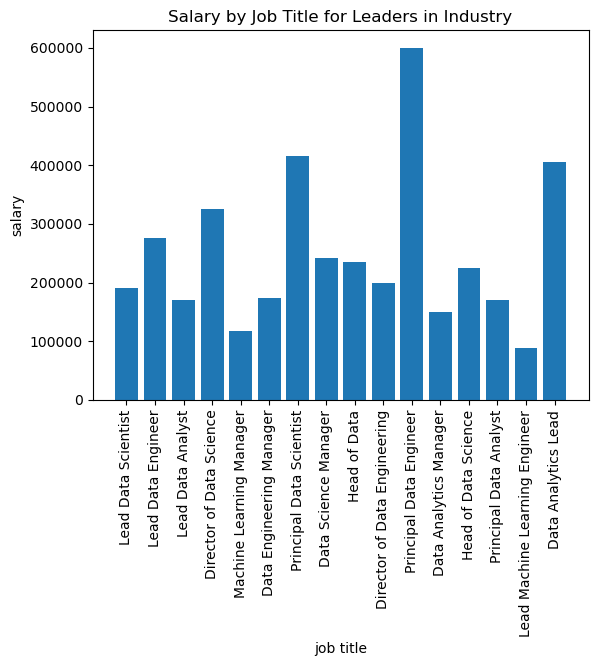

In [54]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Leaders in Industry')
plt.bar(leaders['job_title'], leaders['salary_in_usd'])

<BarContainer object of 204 artists>

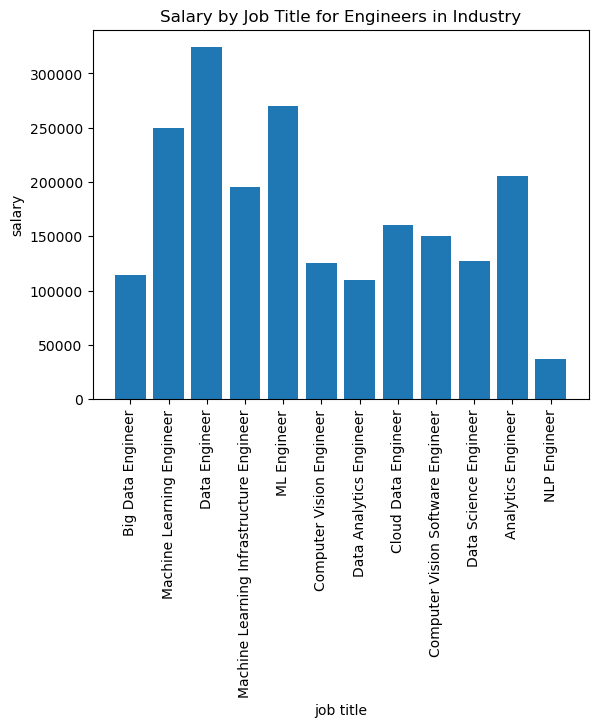

In [53]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Engineers in Industry')
plt.bar(engineers['job_title'], engineers['salary_in_usd'])

<BarContainer object of 122 artists>

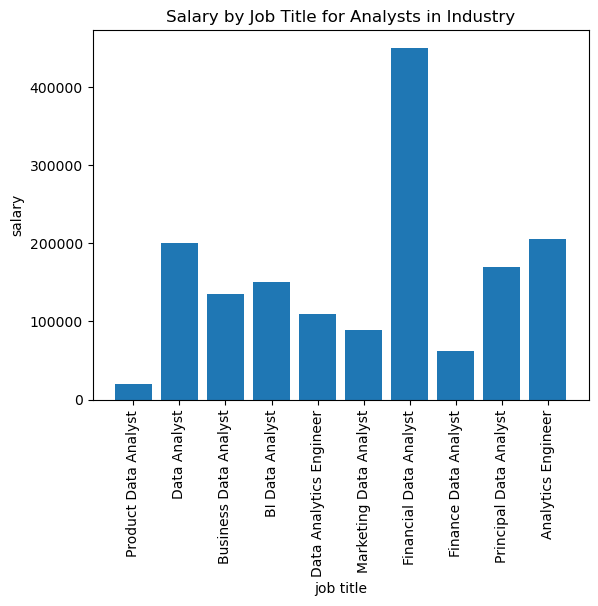

In [55]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Analysts in Industry')
plt.bar(analysts['job_title'], analysts['salary_in_usd'])

<BarContainer object of 188 artists>

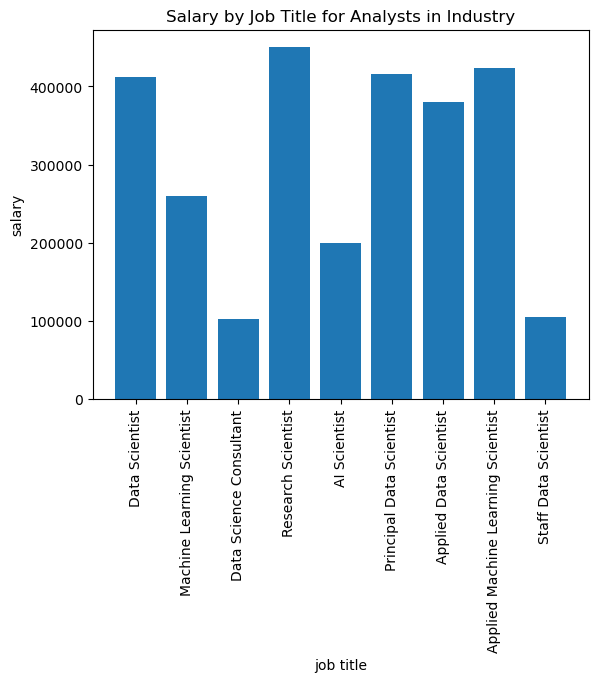

In [56]:
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('salary')
plt.title('Salary by Job Title for Analysts in Industry')
plt.bar(scientists['job_title'], scientists['salary_in_usd'])